<a href="https://colab.research.google.com/github/MaggieHDez/ClassFiles/blob/main/practicasregresionlasso_ridge_RESUELTO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Instrucciones y Objetivos para la Práctica: Regresión Lasso y Ridge**

#### **📌 Objetivos de la Práctica:**  
Al finalizar esta práctica, los estudiantes serán capaces de:  
1. **Realizar un Análisis Exploratorio de Datos (EDA)** completo, incluyendo visualización de distribuciones, detección de outliers y análisis de correlaciones.  
2. **Preprocesar datos** correctamente, manejando valores faltantes, codificando variables categóricas y escalando características.  
3. **Implementar modelos de regresión Lasso y Ridge**, entendiendo cómo la regularización afecta los coeficientes.  
4. **Verificar los supuestos de la regresión lineal** (linealidad, normalidad de residuos, homocedasticidad y multicolinealidad).  
5. **Comparar el rendimiento** de ambos modelos y analizar qué variables son más relevantes en cada caso.  

---

### **📋 Instrucciones**  

#### **🔹 Paso 1: Configuración Inicial**
✅ Carga el set de datos que puedes encontrar en el campus virtual
✅ Ejecutar las celdas de importación de librerías y carga del dataset.  
✅ Familiarizarse con los datos usando `.head()`, `.info()` y `.describe()`.  

#### **🔹 Paso 2: Análisis Exploratorio (EDA)**  
📊 **Para variables numéricas:**  
- Generar histogramas y boxplots para identificar distribuciones y outliers.  
- Calcular medidas de tendencia central y dispersión.  

📊 **Para variables categóricas:**  
- Usar gráficos de barras para visualizar frecuencias.    

#### **🔹 Paso 3: Matriz de Correlación**  
✅ Calcular la matriz de correlación **solo para variables numéricas**.  
✅ Generar un **mapa de calor** para visualizar relaciones.  
📌 **Pregunta:** ¿Qué variables están más correlacionadas con el target (`charges`)? (salida del dataset)  

#### **🔹 Paso 4: Preprocesamiento**  
🔧 **Tareas:**  
1. Manejar valores faltantes con `SimpleImputer`.  
2. Codificar variables categóricas con `OneHotEncoder`.  
3. Estandarizar variables numéricas con `StandardScaler`.  
✅ Verificar que el dataset transformado no tenga valores nulos.  

#### **🔹 Paso 5: Modelado (Lasso y Ridge)**  
🎯 **Para cada modelo:**  
1. Ajustar el modelo con los hiperparámetros dados (`alpha=0.1` para Lasso, `alpha=1.0` para Ridge).  
2. Calcular **MSE** y **R²** para evaluar rendimiento.  
3. Analizar los coeficientes para identificar variables importantes.  

📌 **Pregunta:**  
- ¿Qué modelo tiene un mejor R²? ¿Por qué crees que ocurre esto?  
- ¿Qué variables tienen coeficientes cercanos a cero en Lasso? ¿Por qué?  

#### **🔹 Paso 6: Verificación de Supuestos**  
📉 **Para cada modelo, verificar:**  
1. **Linealidad** (gráfico de residuos vs predicciones).  
2. **Normalidad de residuos** (QQ-Plot y test de Shapiro-Wilk).  
3. **Homocedasticidad**
4. **Multicolinealidad** (VIF > 10 indica problema).  

📌 **Pregunta:**  
- ¿Se cumplen los supuestos en ambos modelos?  
- Si hay heterocedasticidad, ¿cómo podría solucionarse?  

#### **🔹 Paso 7: Comparación Final**  
📊 **Analizar:**  
- ¿Qué modelo es más interpretable?  
- ¿Cuál reduce mejor el sobreajuste?  
- ¿Qué variables son más importantes en cada caso?  

---

### **📌 Entrega de la Práctica**  
Al finalizar la practica, incluye un texto con los siguientes elementos
- Incluir **comentarios explicativos** en cada paso.  
- Responder las **preguntas planteadas** en celdas Markdown.  

🎯 **Criterios de Evaluación:**  
✔ **Correcto preprocesamiento** (manejo de nulos, escalado, encoding).  
✔ **Análisis visual y estadístico** (gráficos claros, interpretación de resultados).  
✔ **Validación de supuestos** (justificación de si se cumplen o no).  
✔ **Comparación crítica** entre Lasso y Ridge.  

In [35]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#### **🔹 Paso 1: Configuración Inicial**
✅ Carga el set de datos que puedes encontrar en el campus virtual
✅ Ejecutar las celdas de importación de librerías y carga del dataset.  
✅ Familiarizarse con los datos usando `.head()`, `.info()` y `.describe()`.  

In [46]:
# Cargar de archivos y librerías
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import Lasso, Ridge
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import scipy.stats as stats
from scipy.stats import shapiro
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

df = pd.read_csv('/content/drive/MyDrive/ClassFiles/insurance.csv')

print('Primeras 5 filas\n', df.head())
print('\nInformación estadística\n', df.describe())
print(df.info())

Primeras 5 filas
    age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

Información estadística
                age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010
<class 'pandas.core.frame.DataFrame'>
Ran

#### **🔹 Paso 2: Análisis Exploratorio (EDA)**  
📊 **Para variables numéricas:**  
- Generar histogramas y boxplots para identificar distribuciones y outliers.  
- Calcular medidas de tendencia central y dispersión.  

📊 **Para variables categóricas:**  
- Usar gráficos de barras para visualizar frecuencias.    

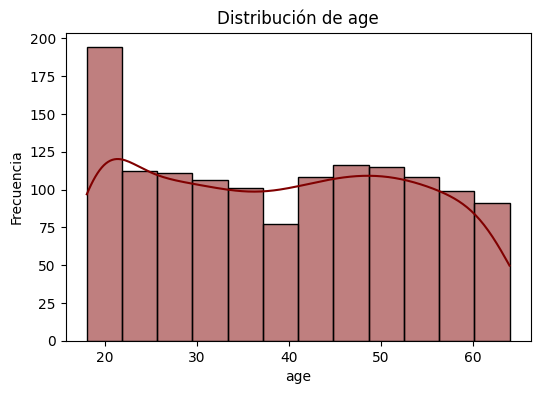

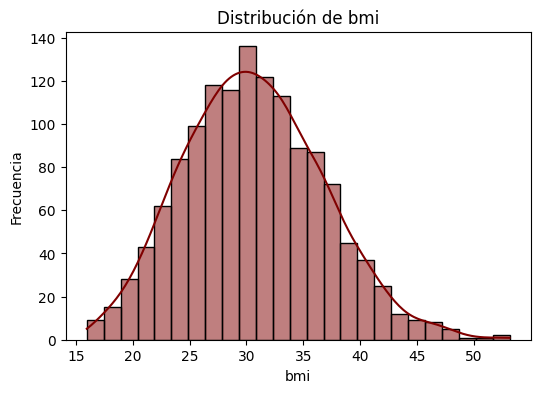

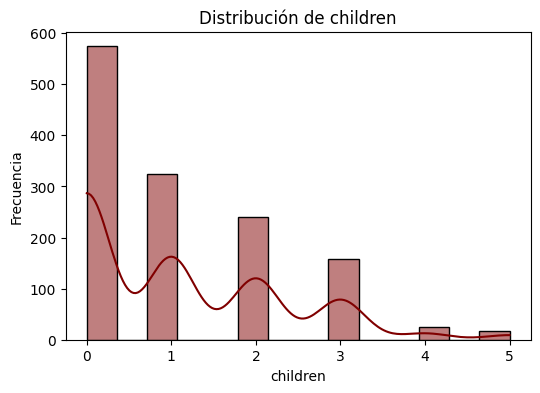

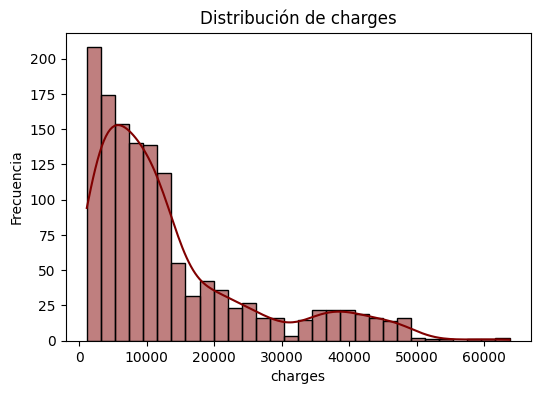

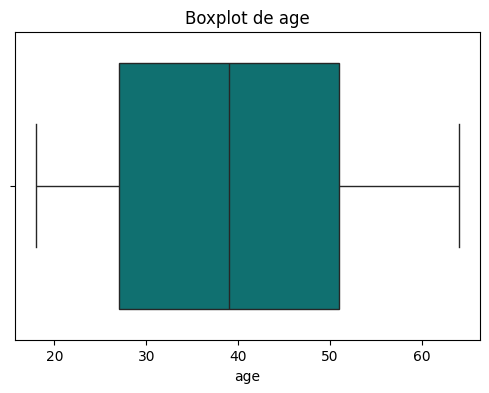

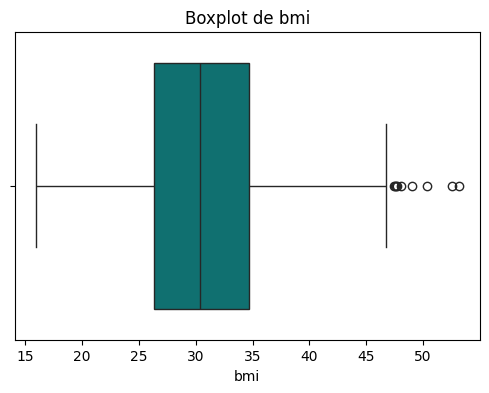

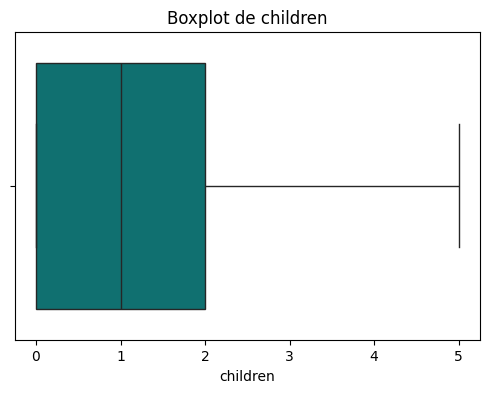

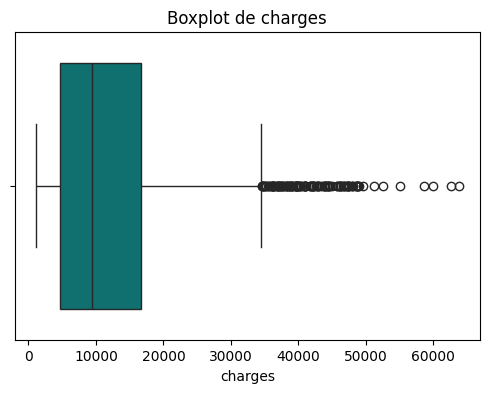


Medidas descriptivas para variables numéricas:
               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010 

Moda para variables categóricas:
   age   sex   bmi  children smoker     region    charges
0   18  male  32.3         0     no  southeast  1639.5631 



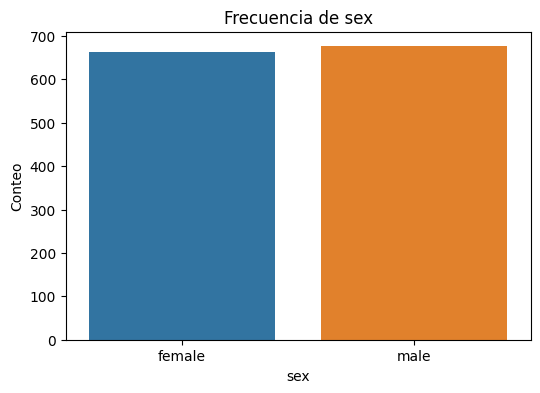

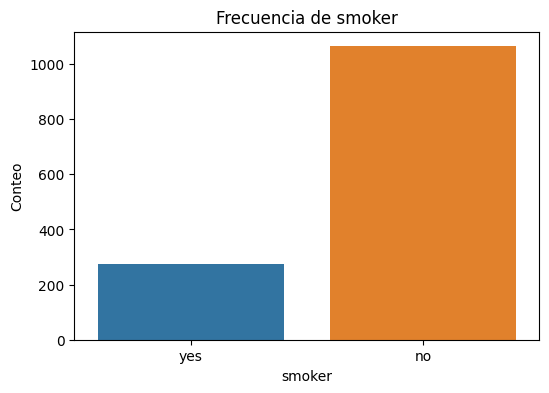

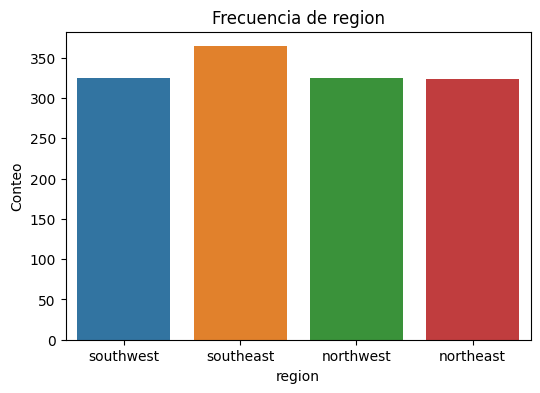

In [37]:
# Variables numéricas
var_num = df.select_dtypes(include=np.number)
# Variables categóricas
var_cat = df.select_dtypes(exclude=np.number)

# Histograma para cada variable numérica
for var in var_num:
    plt.figure(figsize=(6,4))
    sns.histplot(data=df[var], kde=True, color='maroon')
    plt.title(f'Distribución de {var}')
    plt.xlabel(var)
    plt.ylabel('Frecuencia')
    plt.show()

# Boxplots para identificar outliers
for var in var_num:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[var], color='teal')
    plt.title(f'Boxplot de {var}')
    plt.xlabel(var)
    plt.show()

# Medidas de tendencia central y dispersión
print("\nMedidas descriptivas para variables numéricas:")
print(df.describe(),'\n')

print("Moda para variables categóricas:")
print(df.mode(),'\n')

# Gráficos de barras para las variables categóricas
for var in var_cat:
    plt.figure(figsize=(6,4))
    sns.countplot(data=df, x=df[var], hue=var)
    plt.title(f'Frecuencia de {var}')
    plt.xlabel(var)
    plt.ylabel('Conteo')
    plt.show()

#### **🔹 Paso 3: Matriz de Correlación**  
✅ Calcular la matriz de correlación **solo para variables numéricas**.  
✅ Generar un **mapa de calor** para visualizar relaciones.  
📌 **Pregunta:** ¿Qué variables están más correlacionadas con el target (`charges`)? (salida del dataset)
 - **Respuesta:** Las variables `age` y `bmi` son las variables más correlacionadas con `charges`. Estas tienen una correlación moderada, de `0.299` y `0.198` respectivamente. Esto quiere decir que a medida que `age` y `bmi` aumentan, `charges` tiende a aumentar, aunque moderadamente.

Matriz de correlación:
                age       bmi  children   charges
age       1.000000  0.109272  0.042469  0.299008
bmi       0.109272  1.000000  0.012759  0.198341
children  0.042469  0.012759  1.000000  0.067998
charges   0.299008  0.198341  0.067998  1.000000 



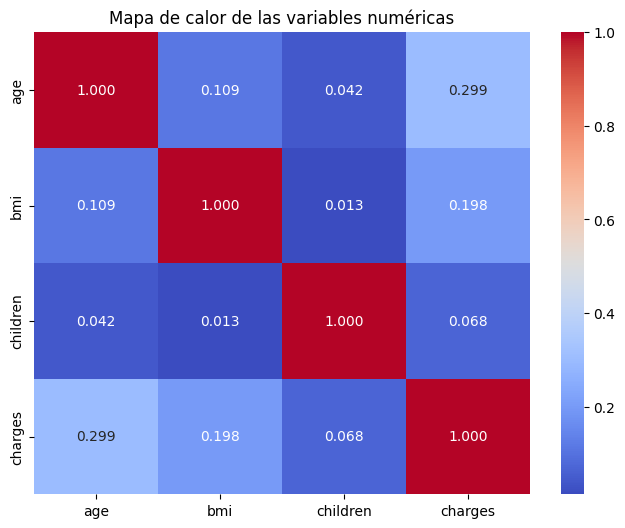

In [38]:
# Matriz de correlación
matriz_corr = var_num.corr()

print('Matriz de correlación:\n', matriz_corr,'\n')

# Mapa de calor
plt.figure(figsize=(8,6))
sns.heatmap(matriz_corr, annot=True, cmap='coolwarm',fmt='.3f')
plt.title('Mapa de calor de las variables numéricas')
plt.show()

#### **🔹 Paso 4: Preprocesamiento**  
🔧 **Tareas:**  
1. Manejar valores faltantes con `SimpleImputer`.  
2. Codificar variables categóricas con `OneHotEncoder`.  
3. Estandarizar variables numéricas con `StandardScaler`.  
✅ Verificar que el dataset transformado no tenga valores nulos.  

In [56]:
# Separar las características en numéricas y categóricas
vars_cat = ['sex', 'smoker', 'region'] # Usamos moda
vars_mediana = ['bmi'] # Con outliers, usamos mediana (no se incluye la variable charges)
vars_media = ['age','children'] # Sin outliers, usamos media
target = df['charges']

print('vars_cat', vars_cat)
print('vars_mediana', vars_mediana)
print('vars_media', vars_media)

# Imputador para cada grupo
imputer_median = SimpleImputer(strategy='median')
imputer_mean = SimpleImputer(strategy='mean')
imputer_mode = SimpleImputer(strategy='most_frequent')

# Pipeline para variables con outliers
pipeline_mediana = Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                                   ('scaler', StandardScaler())])

# Pipeline para variables sin outliers
pipeline_media = Pipeline(steps=[('imputer', SimpleImputer(strategy='mean')),
                                 ('scaler', StandardScaler())])

# Pipeline para variables categóricas
pipeline_categorias = Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')),
                                      ('onehot', OneHotEncoder(drop='first'))])

# preprocesador
preprocessor = ColumnTransformer(transformers=[('num_median', pipeline_mediana, vars_mediana),
                                              ('num_mean', pipeline_media, vars_media),
                                              ('cat', pipeline_categorias, vars_cat)])

# Aplicamos la transformación para que el modelo
# Lasso reciba los datos transformados y sin datos inconsistentes
# Se hace otra variable para no modificar el df completo
df_transformed = preprocessor.fit_transform(df)

# Verificar que no hayan valores nulos en el dataset transformado
nulos = np.isnan(df_transformed).sum()
print("Cantidad de valores nulos en el dataset transformado:", nulos)



vars_cat ['sex', 'smoker', 'region']
vars_mediana ['bmi']
vars_media ['age', 'children']
Cantidad de valores nulos en el dataset transformado: 0


#### **🔹 Paso 5: Modelado (Lasso y Ridge)**  
🎯 **Para cada modelo:**  
1. Ajustar el modelo con los hiperparámetros dados (`alpha=0.1` para Lasso, `alpha=1.0` para Ridge).  
2. Calcular **MSE** y **R²** para evaluar rendimiento.  
3. Analizar los coeficientes para identificar variables importantes.  

📌 **Pregunta:**  
- ¿Qué modelo tiene un mejor R²? ¿Por qué crees que ocurre esto?

- **Respuesta:** de acuerdo a los resultados entre Lasso y Ridge

  $R^{2}$ Lasso: 0.7835873472785649

  $R^{2}$ Ridge: 0.7832807329420659

  Aunque la diferencia es mínima, el $R^{2}$ de Lasso es el mejor ya que se acerca un poco más a 1, lo que explica mejor la variabilidad de los datos que Ridge, pero no por mucho. La pequeña diferencia puede ser por la forma en que se entrenan los modelos y tambien por la penalización baja utilizada(alpha=0.1) lo que ayuda a la predicción de los resultados y que tenga un $R^{2}$ mayor.
- ¿Qué variables tienen coeficientes cercanos a cero en Lasso? ¿Por qué?
  
- **Respuesta:** La variable más cercana a 0 es `sex_male` con -18.137020. La razon por la que no es exactamente 0 es por el `alpha = 0.1`. No es tan fuerte como para reducir las variables completamente a 0.

vars_cat
 ['sex', 'smoker', 'region']
MSE Lasso: 33597789.81377249
R² Lasso: 0.7835873472785649

MSE Ridge: 33645391.30057117
R² Ridge 0.7832807329420659
['bmi', 'age', 'children', 'sex_male', 'smoker_yes', 'region_northwest', 'region_southeast', 'region_southwest']

Coeficientes Lasso:
 bmi                  2054.666758
age                  3609.055495
children              512.382820
sex_male              -18.137020
smoker_yes          23650.480544
region_northwest     -369.036430
region_southeast     -656.103002
region_southwest     -808.125402
dtype: float64 



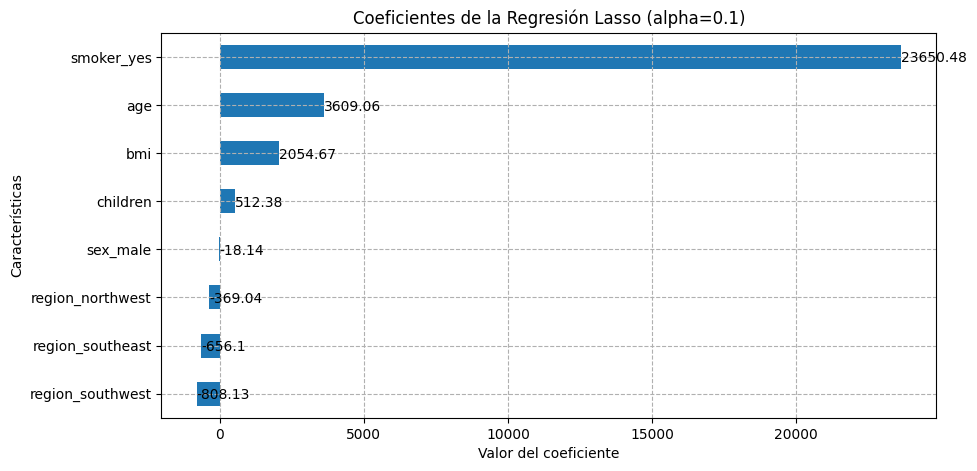


Coeficientes Ridge:
 bmi                  2051.938363
age                  3603.270803
children              513.153656
sex_male              -10.635579
smoker_yes          23514.634824
region_northwest     -366.152625
region_southeast     -643.009456
region_southwest     -802.913351
dtype: float64 



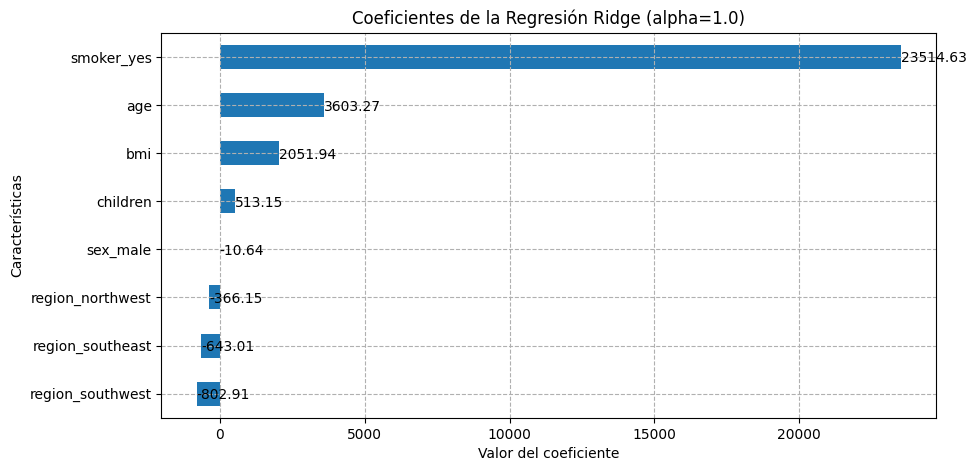

In [57]:
# Asignamos la variable target y df_transformed a 'X' y 'y'
# para después dividirlas en variables de entrenamiento y prueba (80%, 20%)
X = df_transformed
y = target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Realizamos el modelo Lasso con alpha=0.1 y alpha=1.0 para ridge
alpha = 0.1
ridge = 1.0

# Modelo Lasso (alpha=0.1)
modelo_lasso = Lasso(alpha=alpha, max_iter=10000)
modelo_lasso.fit(X_train, y_train)
y_pred_lasso = modelo_lasso.predict(X_test)

mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print("MSE Lasso:", mse_lasso)
print("R² Lasso:", r2_lasso)

# Modelo Ridge (alpha=1.0)
modelo_ridge = Ridge(alpha=ridge)
modelo_ridge.fit(X_train, y_train)
y_pred_ridge = modelo_ridge.predict(X_test)

mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print("\nMSE Ridge:", mse_ridge)
print("R² Ridge", r2_ridge)

# Usamos el preprocesador que se definió anteriormente para obtener los nombres de las variables
nombres_cat = preprocessor.named_transformers_["cat"].named_steps["onehot"].get_feature_names_out(vars_cat)

# Concatenamos los nombres en el mismo orden en que el preprocesador los genera
feature_names = vars_mediana + vars_media + list(nombres_cat)

# Crear una Serie con los coeficientes del modelo Lasso y asignar los nombres de variables
coef = pd.Series(modelo_lasso.coef_, index=feature_names)
print("\nCoeficientes Lasso:\n", coef, "\n")

# Graficar los coeficientes de la regresión Lasso
plt.figure(figsize=(10, 5))
coef.sort_values().plot(kind="barh")
plt.title(f"Coeficientes de la Regresión Lasso (alpha={alpha})")
plt.xlabel("Valor del coeficiente")
plt.ylabel("Características")
plt.grid(True, linestyle="--")
# Agregamos la etiqueta a la barra con plt.text
for i, v in enumerate(coef.sort_values()):
    plt.text(v, i, str(round(v, 2)), color='black', va='center_baseline')
    # 'va' alinea el texto de manera vertical en el centro de la barra

plt.show()

# Crear una Serie con los coeficientes del modelo Ridge y asignar los nombres de variables
coef_ridge = pd.Series(modelo_ridge.coef_, index=feature_names)
print("\nCoeficientes Ridge:\n", coef_ridge, "\n")

# Graficar los coeficientes de la regresión Ridge
plt.figure(figsize=(10, 5))
coef_ridge.sort_values().plot(kind="barh")
plt.title(f"Coeficientes de la Regresión Ridge (alpha={ridge})")
plt.xlabel("Valor del coeficiente")
plt.ylabel("Características")
plt.grid(True, linestyle="--")
# Agregamos la etiqueta a la barra con plt.text
for i, v in enumerate(coef_ridge.sort_values()):
    plt.text(v, i, str(round(v, 2)), color='black', va='center_baseline')
    # 'va' alinea el texto de manera vertical en el centro de la barra

plt.show()

#### **🔹 Paso 6: Verificación de Supuestos**  
📉 **Para cada modelo, verificar:**  
1. **Linealidad** (gráfico de residuos vs predicciones).  
2. **Normalidad de residuos** (QQ-Plot y test de Shapiro-Wilk).  
3. **Homocedasticidad**
4. **Multicolinealidad** (VIF > 10 indica problema).  

📌 **Pregunta:**  
- ¿Se cumplen los supuestos en ambos modelos?
- **Respuesta:** Revisando la normalidad, podemos ver que no se cumple ya que, de acuerdo a la prueba Shapiro-Wilk, los residuos no siguen una distribución normal. Para la multicolinealidad si se cumplen ya que el VIF no llega a alcanzar o sobrepasar 5, dando a entender que no hay problemas de este tipo.
  Finalmente, se puede observar en las gráficas de dispersión que los residuos no siguen un patrón fijo, lo que indica que hay homocedasticidad.
- Si hay heterocedasticidad, ¿cómo podría solucionarse?
- **Respuesta:** Se puede solucionar mediante la transformación de la variable dependiente (`charges`), por ejemplo la transformación logarítmica, usar errores estándar robustos(HC0, HC1, HC2,HC3, clúster o Newey-West) y/o usar modelos ponderados, como Weighted Least Squares(WLS), Generalized Least Squares (GLS), Feasible Generalized Least Squares (FGLS).

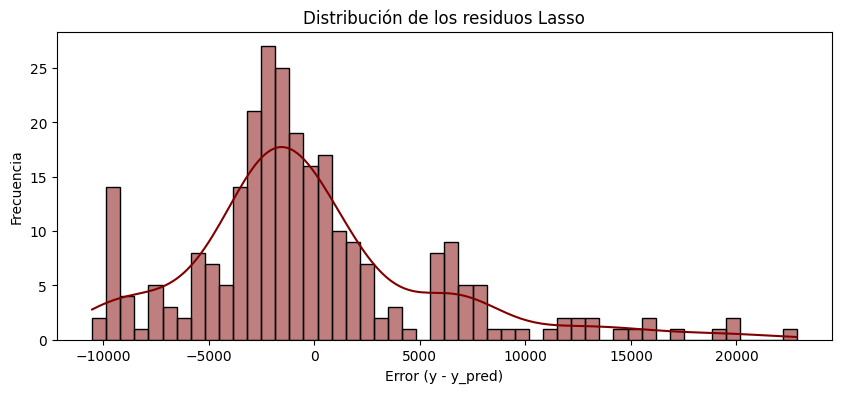

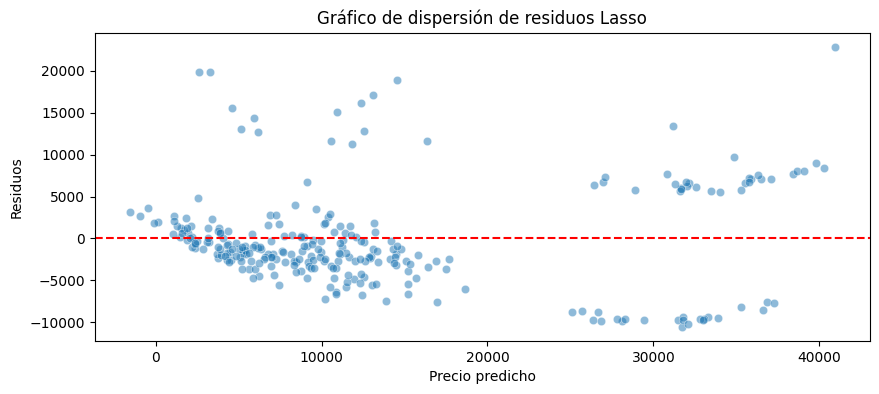

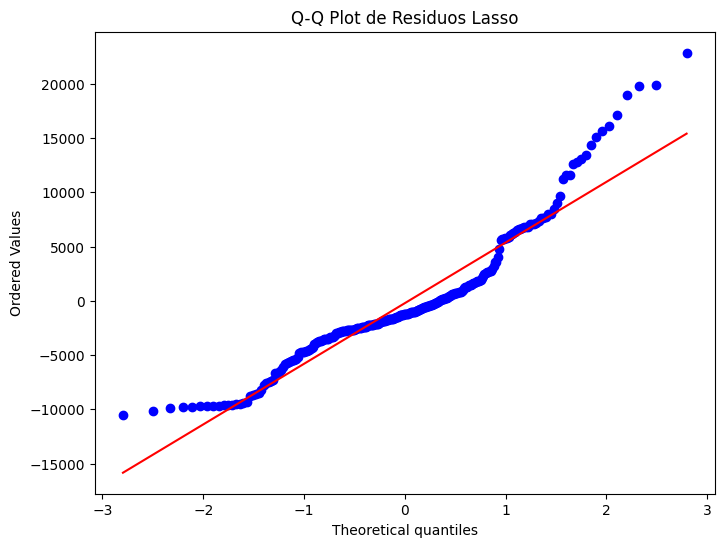


Shapiro-Wilk Lasso: stat = 0.914, p-value = 2.7188150671605646e-11 



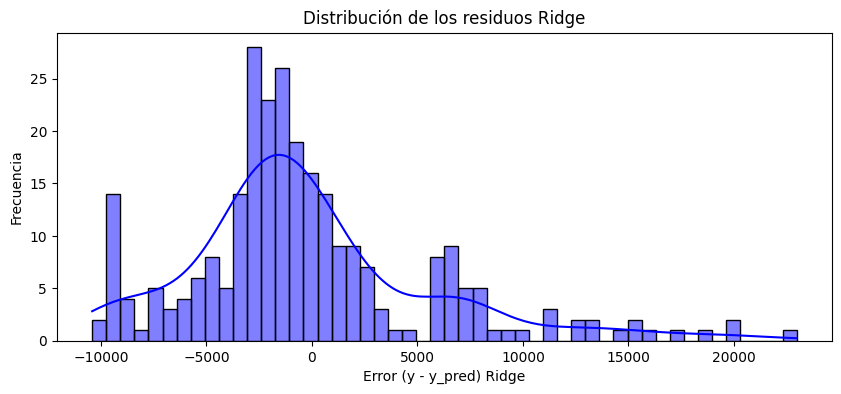

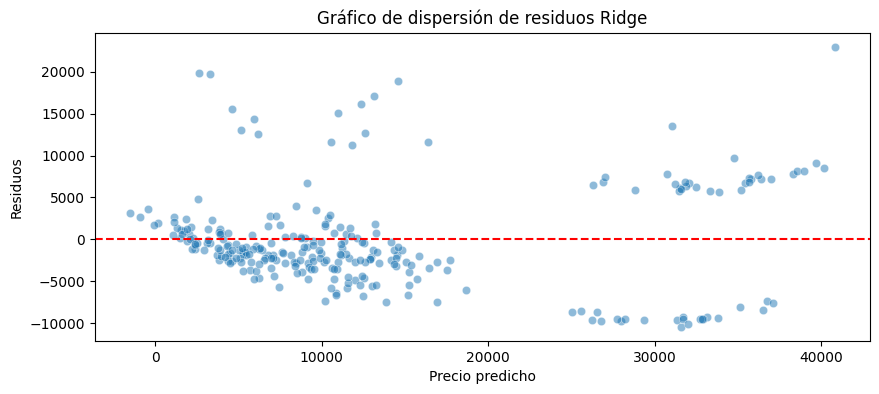

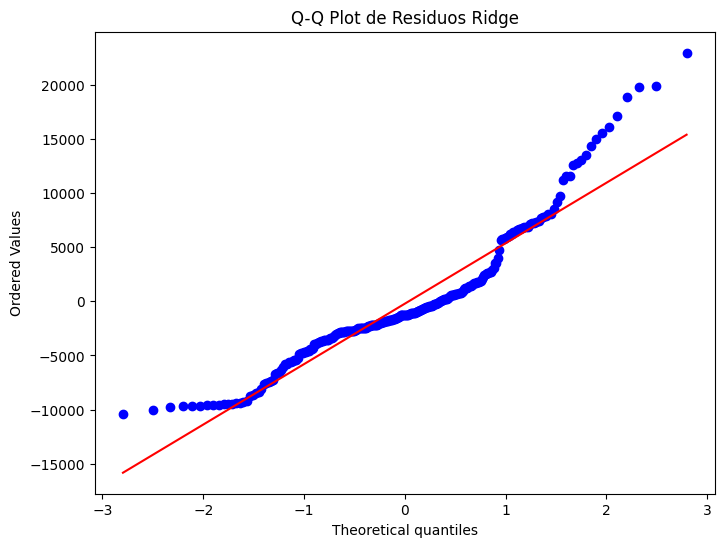


Shapiro-Wilk Ridge: stat = 0.913, p-value = 2.138804326121678e-11 


### Análisis de Multicolinealidad ###
           Variable       VIF
0             const  5.380140
1               bmi  1.094986
2               age  1.023084
3          children  1.005643
4          sex_male  1.006303
5        smoker_yes  1.011703
6  region_northwest  1.493159
7  region_southeast  1.613285
8  region_southwest  1.515246


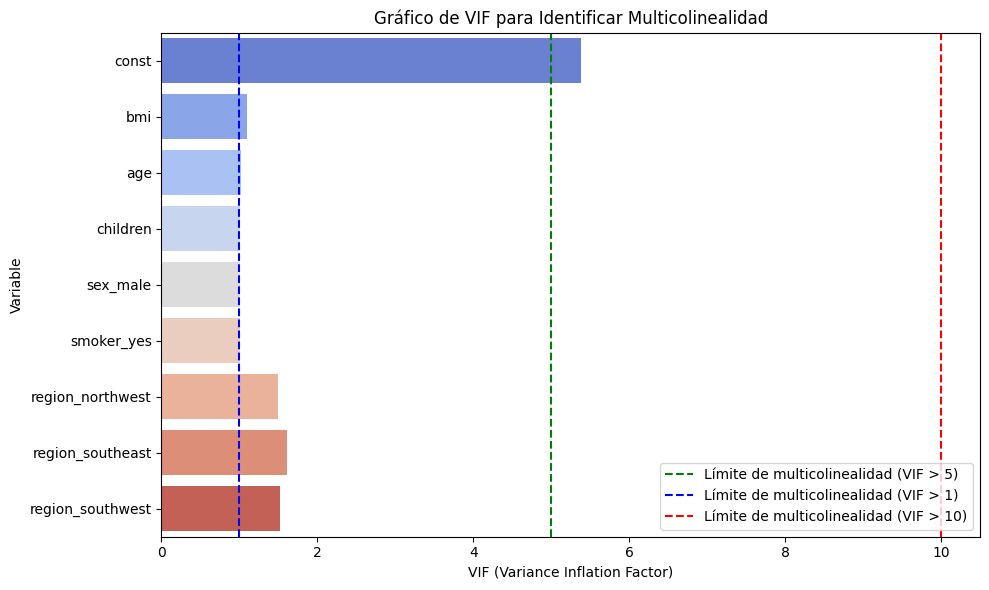

In [50]:
# Residuos para el modelo Lasso
residuos_lasso = y_test - y_pred_lasso

plt.figure(figsize=(10,4))
sns.histplot(residuos_lasso, bins=50, kde=True, color="maroon")
plt.xlabel("Error (y - y_pred)")
plt.ylabel("Frecuencia")
plt.title("Distribución de los residuos Lasso")
plt.show()

# Gráfico de dispersión de residuos Lasso
# Para comprobar Homocedasticidad
plt.figure(figsize=(10, 4))
sns.scatterplot(x=y_pred_lasso, y=residuos_lasso, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Precio predicho")
plt.ylabel("Residuos")
plt.title("Gráfico de dispersión de residuos Lasso")
plt.show()

# Q-Q Plot para revisar la normalidad en el modelo Lasso
plt.figure(figsize=(8, 6))
stats.probplot(residuos_lasso, dist="norm", plot=plt)
plt.title(f"Q-Q Plot de Residuos Lasso")
plt.show()

# Shapiro-Wilk Test para residuos Lasso
stat_lasso, p_lasso = shapiro(residuos_lasso)
print(f"\nShapiro-Wilk Lasso: stat = {stat_lasso:.3f}, p-value = {p_lasso}", "\n")

# Residuo para el modelo Ridge
residuos_ridge = y_test - y_pred_ridge

plt.figure(figsize=(10,4))
sns.histplot(residuos_ridge, bins=50, kde=True, color="blue")
plt.xlabel("Error (y - y_pred) Ridge")
plt.ylabel("Frecuencia")
plt.title("Distribución de los residuos Ridge")
plt.show()

# Gráfico de dispersión de residuos Ridge
# Para comprobar Homocedasticidad
plt.figure(figsize=(10, 4))
sns.scatterplot(x=y_pred_ridge, y=residuos_ridge, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Precio predicho")
plt.ylabel("Residuos")
plt.title("Gráfico de dispersión de residuos Ridge")
plt.show()

# Q-Q Plot para revisar la normalidad en el modelo Ridge
plt.figure(figsize=(8, 6))
stats.probplot(residuos_ridge, dist="norm", plot=plt)
plt.title(f"Q-Q Plot de Residuos Ridge")
plt.show()

# Shapiro-Wilk Test para residuos Ridge
stat_ridge, p_ridge = shapiro(residuos_ridge)
print(f"\nShapiro-Wilk Ridge: stat = {stat_ridge:.3f}, p-value = {p_ridge}", "\n")

# Multicolinealidad: Cálculo de VIF (Variance Inflation Factor)
# VIF > 5 o 10 indica posible multicolinealidad.
X_vif = pd.DataFrame(X_train, columns=feature_names)

# Agregar constante para calcular el VIF
X_vif = add_constant(X_vif) # Matriz de características sin la variable dependiente
vif_data = pd.DataFrame()
vif_data['Variable'] = X_vif.columns
vif_data['VIF'] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]

print("\n### Análisis de Multicolinealidad ###")
print(vif_data)

# Visualización de VIF
plt.figure(figsize=(10, 6))
sns.barplot(x='VIF', y='Variable', data=vif_data, palette='coolwarm', hue='Variable') # Se agregó hue para remover el warning
plt.axvline(x=5, color='green', linestyle='--', label='Límite de multicolinealidad (VIF > 5)')
plt.axvline(x=1, color='blue', linestyle='--', label='Límite de multicolinealidad (VIF > 1)')
plt.axvline(x=10, color='red', linestyle='--', label='Límite de multicolinealidad (VIF > 10)')
plt.xlabel('VIF (Variance Inflation Factor)')
plt.title('Gráfico de VIF para Identificar Multicolinealidad')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()


#### **🔹 Paso 7: Comparación Final**  
📊 **Analizar:**  
- ¿Qué modelo es más interpretable?
- **Respuesta:** El modelo más interprtable en este caso el el modelo Lasso ya que por su penalización $L_{1}$($ |\beta| $) puede reducir los coeficientes exactamente a 0, mientras que el modelo Ridge tiene una penalización $L_2$($ \beta^2 $) que mantiene todas las variable pero reduce el efecto que tienen y es más útil cuando hay colinealidad. Ya que Ridge no elimina por completo las variables esto provoca que su interpretación no sea fácil, ya que existen variables que pueden no tener relevancia al final, en cambio, Lasso elimina las varibales y sólo incluye las que tienen más relevancia en el modelo al final.
- ¿Cuál reduce mejor el sobreajuste?
- **Respuesta:** Esto es dependiendo del caso. Ridge elimina mejor el sobreajuste en casos done hay colinealidad entre variables, mientras que Lasso es útil cuando se tiene muchas variables y se requiere un modelo más simple, eliminando las variables irrelevantes.
- ¿Qué variables son más importantes en cada caso?
- **Respuesta:** Para Lasso las variables importantes son: `smoker` la de mayor peso y, `age` y `bmi` con un peso moderado.
Igual que Lasso pero con diferentes cantidades, para Ridge las variables importantes son `smoker` con un peso significativo y `age` y `bmi` con un peso moderado.